## Observations and Insights 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on = 'Mouse ID')
# Display the data table for preview
combined_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the distinct number of mice.
print(combined_df['Mouse ID'].nunique())

249


In [39]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mouse = duplicate_df['Mouse ID'].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [42]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_1 = combined_df.loc[combined_df["Mouse ID"] == "g989"]

#view duplicate data
duplicate_mouse_1


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [43]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
no_duplicates = combined_df.loc[combined_df["Mouse ID"] != "g989"]

In [44]:
# Checking the number of mice in the clean DataFrame.
print(no_duplicates['Mouse ID'].nunique())

248


In [47]:
#Checking number of rows
no_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [58]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# Assemble the resulting series into a single summary dataframe.

#groupby drug regimen and calculate mean, median, variance, standard deviation and standard error of tumor volume
mean = no_duplicates.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = no_duplicates.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = no_duplicates.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
st_dev = no_duplicates.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
std_err = no_duplicates.groupby('Drug Regimen').sem()['Tumor Volume (mm3)'] 

# Assemble the resulting series into a single summary dataframe. 
sum_table = pd.DataFrame({"Mean" : mean, "Median" : median, "Variance" : variance, "St. Dev." : st_dev, "Std. Err." : std_err})

# View summary table
sum_table



,Mean,Median,Variance,St. Dev.,Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [63]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
agg_table = no_duplicates.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
agg_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Mice Tested')

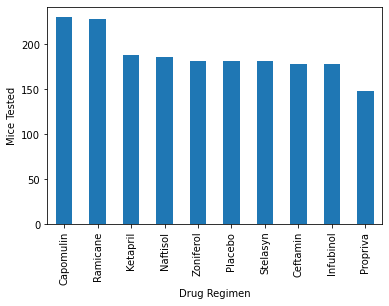

In [197]:
panda_chart = no_duplicates['Drug Regimen'].value_counts()
plotdata["Drug Regimen"].plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Tested")



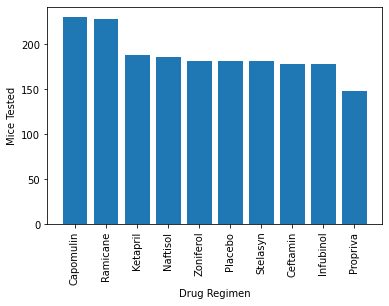

In [200]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
pyplot_chart = no_duplicates['Drug Regimen'].value_counts()
plt.bar(pyplot_chart.index.values,pyplot_chart.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Mice Tested")
plt.show()


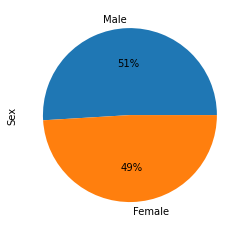

In [125]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = no_duplicates.Sex.value_counts()
gender_counts.plot(kind="pie",autopct='%1.f%%')
plt.show()


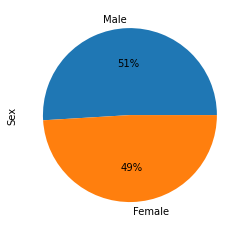

In [126]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = no_duplicates.Sex.value_counts()
plt.pie(counts.values,labels=counts.index.values,autopct='%1.f%%')
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [142]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = no_duplicates.groupby(["Mouse ID"])['Timepoint'].max()
max_timepoint = pd.DataFrame(max_timepoint)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint = max_timepoint.merge(no_duplicates,on=['Mouse ID','Timepoint'])

# View merged data
last_timepoint

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [149]:
last_timepoint['Drug Regimen'].value_counts()

Placebo      25
Ramicane     25
Ketapril     25
Naftisol     25
Zoniferol    25
Capomulin    25
Ceftamin     25
Infubinol    25
Stelasyn     24
Propriva     24
Name: Drug Regimen, dtype: int64

In [273]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = last_timepoint.loc[last_timepoint["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_list.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print(f"Outliers for {drug} : {outliers}")

Outliers for Capomulin : Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Ramicane : Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Infubinol : 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Outliers for Ceftamin : Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Tumor Volume')

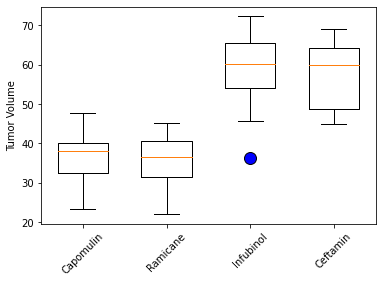

In [274]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot_dict = dict(markerfacecolor='blue',markersize=12)
plt.boxplot(tumor_list, labels = drug_list,flierprops=boxplot_dict,widths=(.6))
plt.xticks(rotation = 45)
plt.ylabel('Tumor Volume')

## Line and Scatter Plots

In [275]:
# Identify a mouse ID for line plot
last_timepoint['Mouse ID'].value_counts(50)

r554    0.004032
l471    0.004032
a251    0.004032
n304    0.004032
y769    0.004032
          ...   
j246    0.004032
s710    0.004032
l700    0.004032
h333    0.004032
u364    0.004032
Name: Mouse ID, Length: 248, dtype: float64

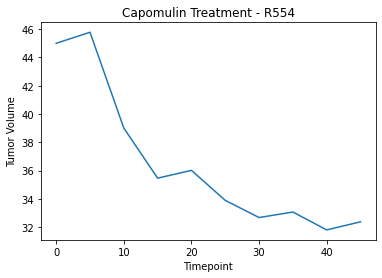

In [276]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_treatment = no_duplicates.loc[no_duplicates['Drug Regimen'] == "Capomulin"]
mouse_id = capomulin_treatment.loc[capomulin_treatment['Mouse ID']== 'r554']
plt.plot(mouse_id['Timepoint'],mouse_id['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Capomulin Treatment - R554')
plt.show()

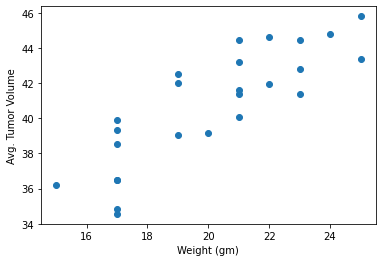

In [277]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_capomulin = capomulin_treatment.groupby(['Mouse ID']).mean()
plt.scatter(avg_capomulin['Weight (g)'],avg_capomulin['Tumor Volume (mm3)'])
plt.xlabel('Weight (gm)')
plt.ylabel('Avg. Tumor Volume')
plt.show()

## Correlation and Regression

Correlation of Mouse Weight and Average Tumor Volume: 0.84


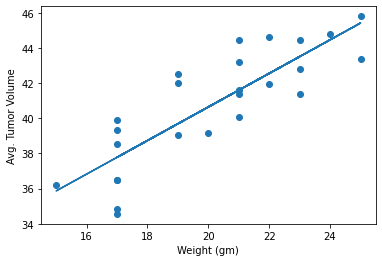

In [278]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(avg_capomulin['Weight (g)'],avg_capomulin['Tumor Volume (mm3)'])[0],2)

# Print Correlation for mouse weight and tumor volume
print(f"Correlation of Mouse Weight and Average Tumor Volume: {correlation}")

#Set x and y values
x_values = avg_capomulin['Weight (g)']
y_values = avg_capomulin['Tumor Volume (mm3)']


regression  = st.linregress(x_values,y_values)

#Create slope and intercept variables

slope = regression[0]
intercept = regression[1]

# Calculate line equation
line_equation = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,line_equation)
plt.xlabel('Weight (gm)')
plt.ylabel('Avg. Tumor Volume')
plt.show()

# Observations & Insights

1. There is a strong postitive correlation between mouse weight and average tumor volume.
2. Capomulin treatment appeared to significantly reduce tumor size in mouse R554 in approximately 40 days.
3. Infubinol and Ceftamin do not appear to be as successful in tumor reduction as Capomulin and Ramicane treatments.